## Code


## quantum k means clustering


In [ ]:
!pip install qiskit_aer
!pip install qiskit-ibm-runtime

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from math import pi
from qiskit_aer import Aer
from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import ZGate, CXGate
from sklearn.preprocessing import StandardScaler


In [ ]:
# Function to create a quantum circuit for distance calculation
def distance_circuit(theta):
    qr = QuantumRegister(2, name="qr")
    cr = ClassicalRegister(1, name="cr")
    qc = QuantumCircuit(qr, cr)

    qc.h(qr)
    qc.rx(theta, qr[1])  # Use rx gate instead of u3
    qc.append(CXGate(), [qr[1], qr[0]])
    qc.measure(qr[0], cr[0])

    return qc


In [ ]:
# Function to calculate the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

In [ ]:
# Function to perform quantum distance calculation
def quantum_distance(point1, point2, backend):
    theta = euclidean_distance(point1, point2)
    qc = distance_circuit(theta)
    transpiled_qc = transpile(qc, backend)
    transpiled_job = backend.run(transpiled_qc, shots=1024)
    result = transpiled_job.result()
    counts = result.get_counts()
    return counts.get('1', 0) / 1024.0


In [ ]:
# Function to assign points to nearest centroid
def assign_to_nearest_centroid(points, centroids, backend):
    assignments = []
    for point in points:
        distances = [quantum_distance(point, centroid, backend) for centroid in centroids]
        assignments.append(np.argmin(distances))
    return np.array(assignments)


In [ ]:
# Function to update centroids
def update_centroids(points, assignments, k):
    centroids = []
    for i in range(k):
        cluster_points = points[assignments == i]
        if len(cluster_points) > 0:
            centroid = np.mean(cluster_points, axis=0)
            centroids.append(centroid)
    return np.array(centroids)

In [ ]:
def quantum_kmeans(points, k, backend):
    # Initialize centroids randomly
    centroids = points[np.random.choice(len(points), k, replace=False)]

    # Perform clustering
    max_iterations = 10
    for _ in range(max_iterations):
        # Assign points to nearest centroid
        assignments = assign_to_nearest_centroid(points, centroids, backend)

        # Update centroids
        centroids = update_centroids(points, assignments, k)

    return assignments, centroids


In [ ]:
# Load data
data = pd.read_csv("Mall_Customers.csv")
points = data[['Annual Income (k$)', 'Spending Score (1-100)']].values


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# EDA
# Removing null values
print(data.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


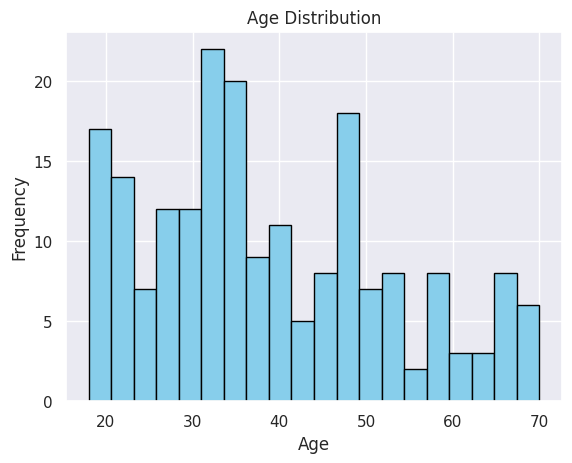

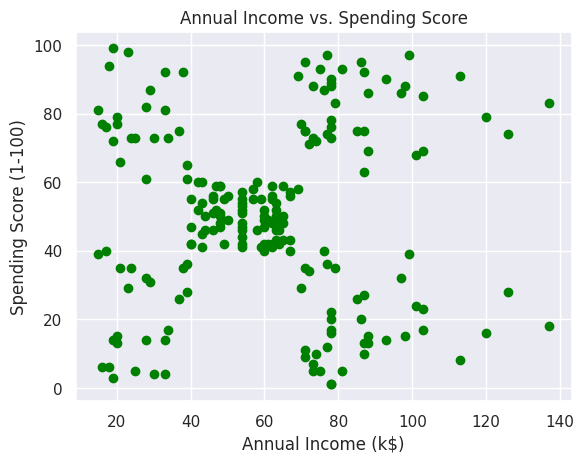

In [ ]:
#Histogram of Age distribution
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# Example: Scatter plot of Annual Income vs. Spending Score
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], color='green')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs. Spending Score')
plt.show()

In [ ]:
# Normalize data
scaler = StandardScaler()
points = scaler.fit_transform(points)

In [ ]:
# Parameters
k = 4  # Number of clusters
backend = Aer.get_backend('qasm_simulator')  # Quantum backend

In [ ]:
# Perform Quantum k-means clustering
assignments, centroids = quantum_kmeans(points, k, backend)


In [ ]:
# Print cluster assignments and centroids
print("Cluster Assignments:", assignments)
print("Centroids:")
for centroid in centroids:
    print(centroid)

Cluster Assignments: [0 0 0 3 2 2 1 2 1 0 0 3 0 3 3 3 2 1 2 0 0 0 3 2 2 3 0 2 1 3 3 1 0 2 1 3 1
 2 1 2 3 0 2 3 1 1 3 3 0 1 0 0 3 3 0 2 0 3 0 1 1 3 0 0 1 2 0 3 0 3 1 2 2 2
 3 2 3 0 0 0 1 0 1 3 0 3 1 2 3 0 1 3 3 3 1 0 0 2 2 3 0 3 0 1 1 1 0 2 3 3 2
 3 3 0 3 3 1 2 1 0 0 2 3 0 0 1 1 0 0 3 0 2 3 1 1 0 1 3 1 0 0 0 3 3 2 0 3 0
 0 3 2 2 2 1 0 0 0 2 1 0 0 2 3 1 0 2 2 1 1 2 1 0 1 2 3 0 3 2 2 3 2 0 3 0 2
 1 0 1 3 1 3 3 0 1 0 3 3 3 1 3]
Centroids:
[-0.04953266  0.0227838 ]
[ 0.08514446 -0.19374667]
[-0.10630186  0.10870037]
[0.06450634 0.04630858]


## Classical K means Clustering

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")


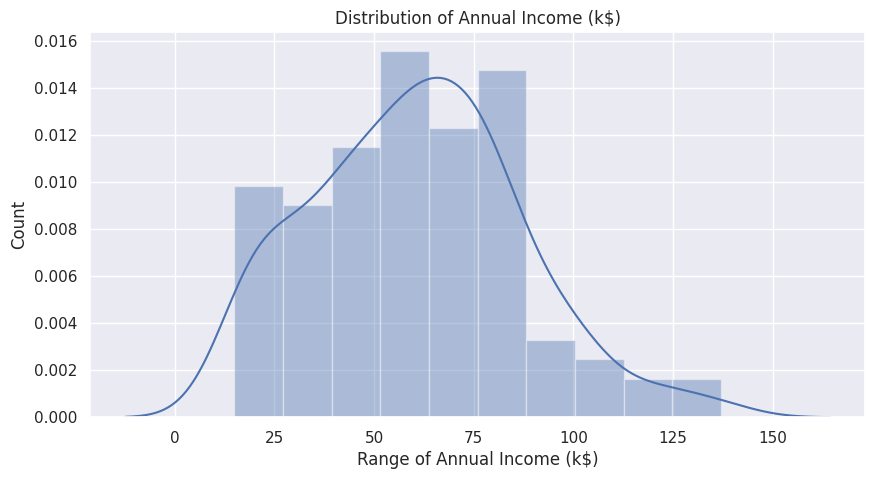

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
# Visualisation
#Distribution of Annnual Income
plt.figure(figsize=(10, 5))
sns.set(style = 'darkgrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.show()


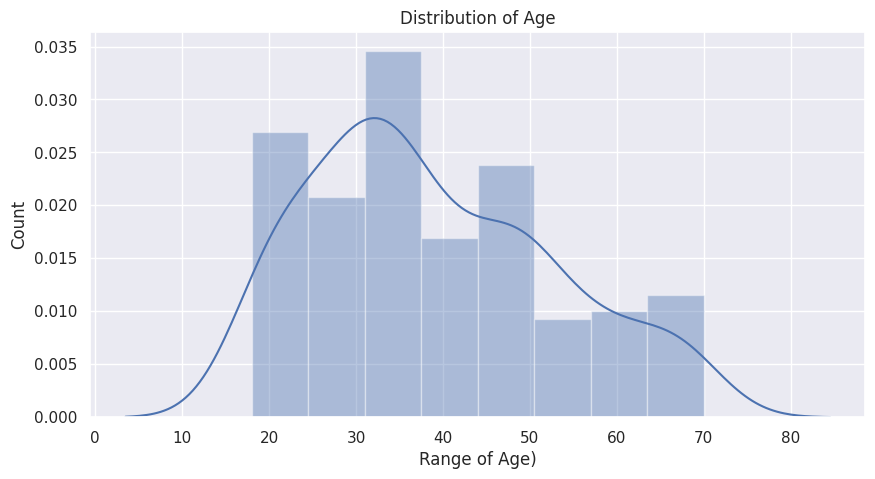

In [ ]:
#Distribution of Age
plt.figure(figsize=(10, 5))
sns.set(style = 'darkgrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Range of Age)')
plt.ylabel('Count')
plt.show()

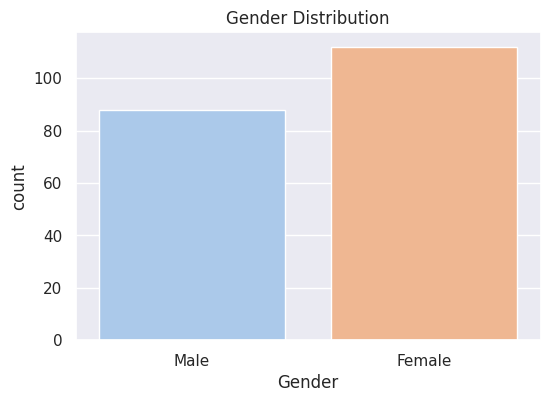

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, 2:])

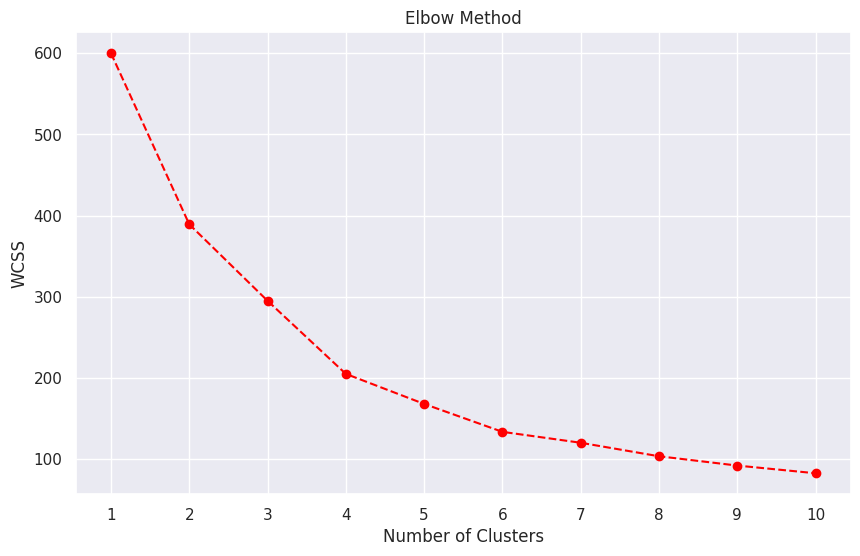

In [ ]:
selected_features = scaled_features
from sklearn.cluster import KMeans

wcss_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features)
    wcss_list.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_list, marker='o', linestyle='--',c="red")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

In [ ]:
# Applying Kmeans Clustering
from sklearn.cluster import KMeans

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(selected_features)
kmeans.labels_


array([2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2,
       3, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 4, 2, 2, 2, 0, 0, 0, 0, 2, 4, 1, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

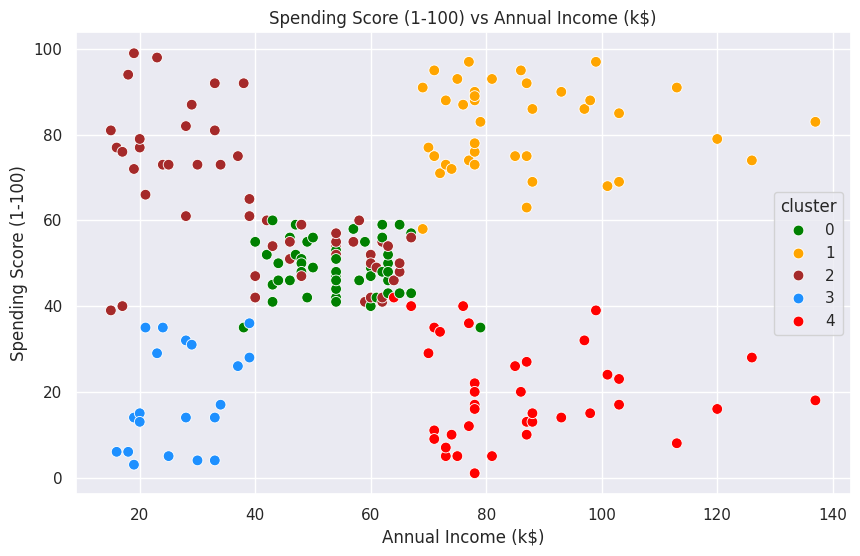

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="cluster",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()